## Telecom Churn Prediction

In [1]:
import numpy as np # numpy used for mathematical operation on array
import pandas as pd # pandas used for data manipulation on dataframe
import matplotlib.pyplot as plt # matplotlib used for data visualization
import seaborn as sns # seaborn used for data visualization
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [3]:
# Read the data by using pandas
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
# Reading first 5 Rows of the train and test data 
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [6]:
# checking shape of the train and test data
print(train.shape)
print( )
print(test.shape)

(7043, 21)

(20, 19)


In [7]:
# drop the customer_ID column which does not have an much impact on data and also dont have any statistical importance becuse it is an automiticaly generated number
train.drop(columns=['customerID'], axis=1, inplace=True)

In [8]:
print(train.shape)
print( )
print(test.shape)

(7043, 20)

(20, 19)


In [9]:
# Reading the name of the columns of the train and test data
print(train.columns)
print( )
print(test.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [10]:
# checking the data types of each columns of train dataset and test data set
train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
test.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [12]:
# checking the descriptive statistics of numeric variables
train.describe() # it gives the mean, max_value, min_value, 25the percentail,50th percentail, 75th percentail of numeric columns

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
# summary of the train DataFrame object, including the total number of rows, column names, number of non-null values in each column, and the data type of each column.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            20 non-null     object 
 1   SeniorCitizen     20 non-null     int64  
 2   Partner           20 non-null     object 
 3   Dependents        20 non-null     object 
 4   tenure            20 non-null     int64  
 5   PhoneService      20 non-null     object 
 6   MultipleLines     20 non-null     object 
 7   InternetService   20 non-null     object 
 8   OnlineSecurity    20 non-null     object 
 9   OnlineBackup      20 non-null     object 
 10  DeviceProtection  20 non-null     object 
 11  TechSupport       20 non-null     object 
 12  StreamingTV       20 non-null     object 
 13  StreamingMovies   20 non-null     object 
 14  Contract          20 non-null     object 
 15  PaperlessBilling  20 non-null     object 
 16  PaymentMethod     20 non-null     object 
 17 

In [15]:
# checking for the missing values in the train and test data
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [17]:
# checking for the unique values present in the train and test data
train.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [18]:
train['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [19]:
train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
# calculate the number of instances for each target class
class_counts = train['Churn'].value_counts()
class_counts

No     5174
Yes    1869
Name: Churn, dtype: int64

In [21]:
# calculate the percentage of instances for each target class
class_percentages = class_counts / len(train) * 100
print(class_percentages)

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


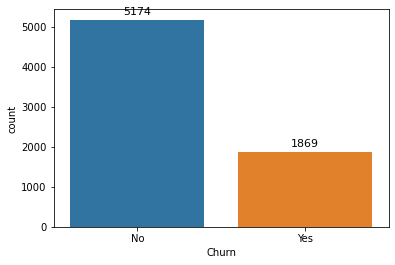

In [22]:
# checking the distribution of the target column Churn
count = sns.countplot(x=train['Churn'], data=train)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

<AxesSubplot:ylabel='Churn'>

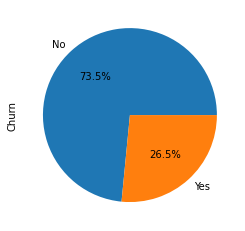

In [23]:
train['Churn'].value_counts().plot(kind="pie", autopct='%1.1f%%')

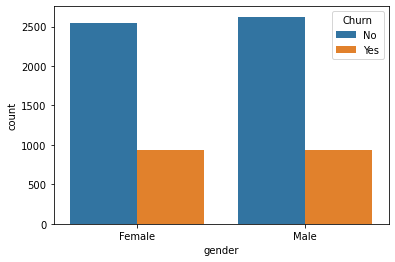

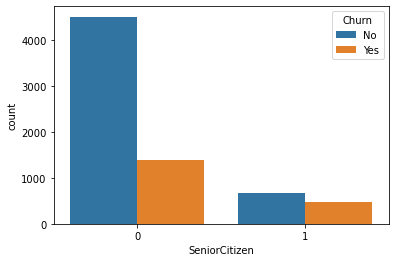

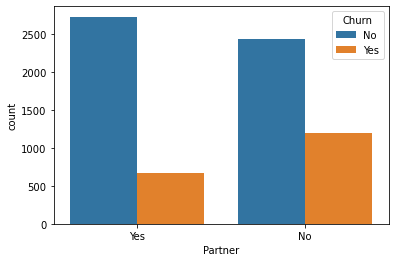

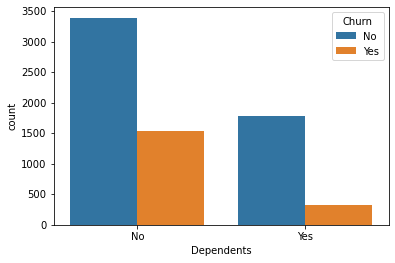

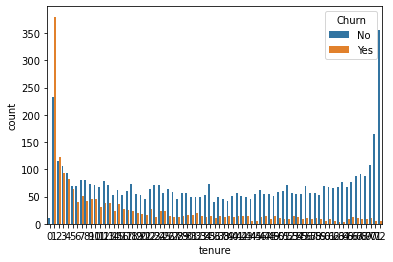

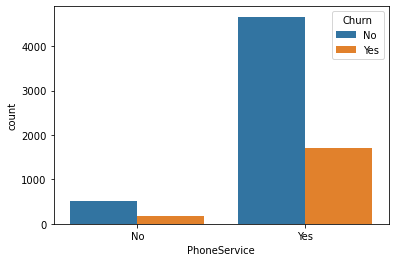

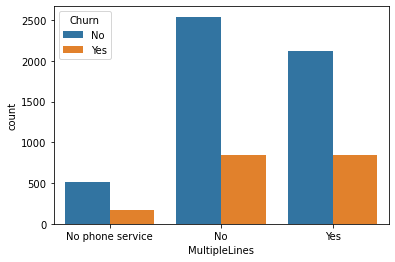

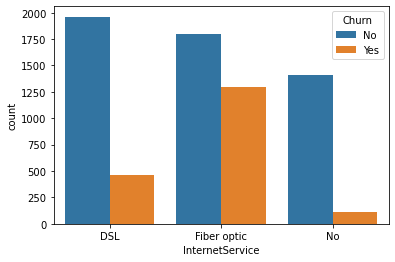

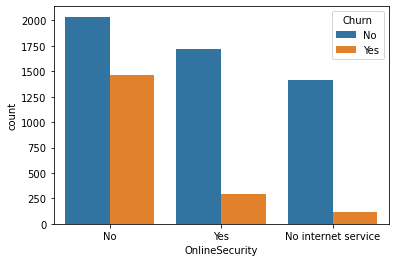

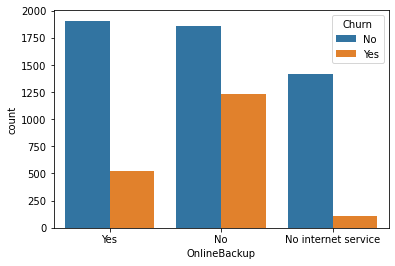

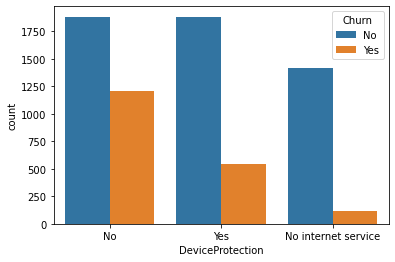

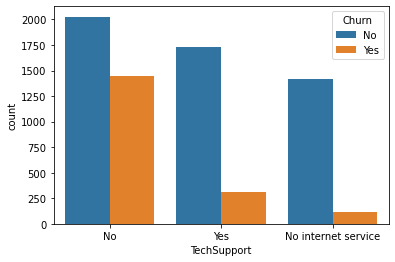

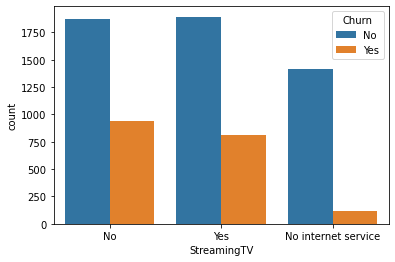

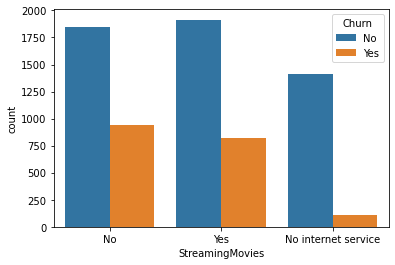

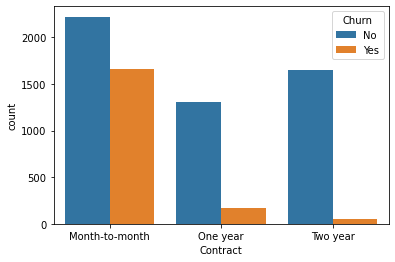

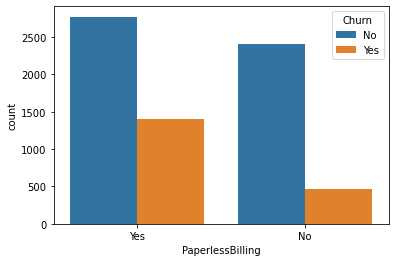

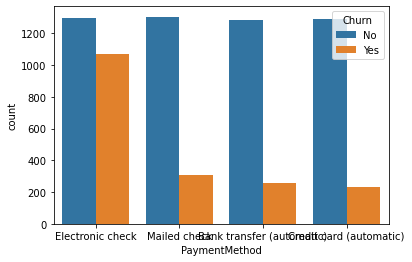

In [24]:
# visualizing the counts of churners withrespect to each columns
# creatin a predictor 
for i, predictor in enumerate(train.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=train, x=predictor, hue='Churn')

In [25]:
train['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors='coerce') # Converting data type of TotalCharges from object to numeric data type

In [26]:
train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [27]:
train.isnull().sum()  

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values are found in the TotalCharges column

In [28]:
train[train['TotalCharges'].isnull()==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [29]:
# the total number of null values present are very less compared to the dataset. so we can fill them with median of the Totalchrges column
train['TotalCharges'].median() 

1397.475

In [30]:
train['TotalCharges'].fillna(1397.475, inplace=True)

In [31]:
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

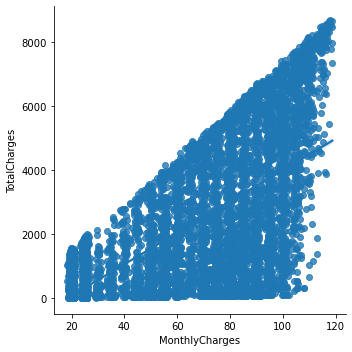

In [32]:
# visualizing the relationship between monthly charges and total charges
sns.lmplot(data=train, x='MonthlyCharges', y='TotalCharges')

In [33]:
test['TotalCharges'] = pd.to_numeric(test['TotalCharges'], errors='coerce')

In [34]:
test.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [35]:
test.isnull().sum()  

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [36]:
# Converting the churn data types into numeric values that is assigning a values as Yes=1, No=0
train['Churn'] = np.where(train.Churn == 'Yes',1,0)

In [37]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [38]:
train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [39]:
# seperating the categorical columnas and numerical columns

train_cat_colms = [column for column in train.columns if train[column].dtype=='object']
print(train_cat_colms)

print(' ')

train_num_colms = [column for column in train.columns if train[column].dtype!='object']
print(train_num_colms)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
 
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [40]:
# converting categorical values to numerical values 
from sklearn.preprocessing import LabelEncoder
for i in train_cat_colms:
    le = LabelEncoder()
    train[i] = le.fit_transform(train[i])

In [41]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [42]:
train.shape

(7043, 20)

In [43]:
test_cat_colms = [column for column in test.columns if test[column].dtype=='object']
print(test_cat_colms)

print(' ')

test_num_colms = [column for column in test.columns if test[column].dtype!='object']
print(test_num_colms)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
 
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [44]:
for i in test_cat_colms:
    le = LabelEncoder()
    test[i] = le.fit_transform(test[i])

In [45]:
test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,25,1,0,1,2,3,3,2,2,2,0,1,2,106.00,2787.00
1,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,30.00,30.00
2,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
3,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
4,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [46]:
test.shape

(20, 19)

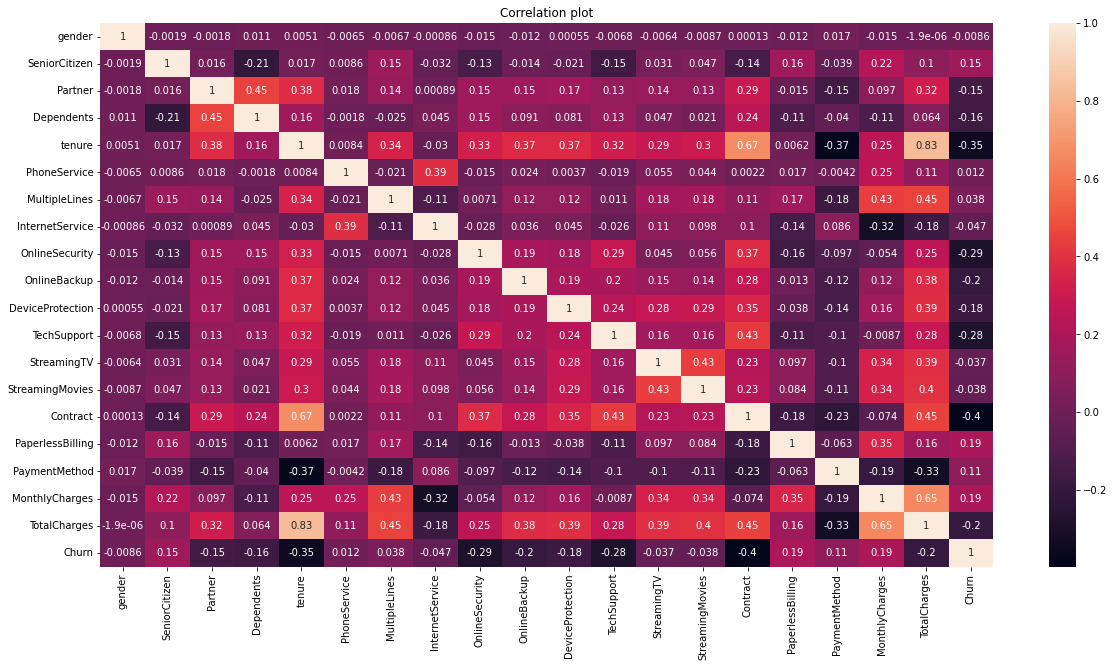

In [47]:
# checking the correlation between the features of the train dataframe by ploting heatmap correlation
train_corr = train.corr() # finding the correlation of the each columns in the train dataframe, the correlation matrix to be visualized
plt.figure(figsize=(20,10)) # specify the width and height of the plot
trainplot = sns.heatmap(train_corr, annot=True,) # create a heatmap plot of a correlation matrix called "train_corr", with annotations displayed on the plot. "annot=True": enables the display of annotations on the heatmap, showing the correlation values for each pair of variables.
plt.title('Correlation plot') # giving the title to the plot 
plt.show() # display the figure

In [48]:
train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [49]:
# Visulaizing the Pairplot of complete dataset
# sns.pairplot(train, hue = 'Churn')

In [50]:
X = train.drop('Churn', axis=True)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [51]:
X.shape

(7043, 19)

In [52]:
Y = train['Churn']
Y.head()  

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [53]:
Y.shape

(7043,)

In [54]:
Y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [55]:
X.shape

(7043, 19)

In [56]:
Y.shape

(7043,)

In [57]:
# visualizing importance of features using ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Instantiate the model
model = ExtraTreesClassifier()

# Fit the model on training data
model.fit(X, Y)

ExtraTreesClassifier()

In [58]:
print(model.feature_importances_)

[0.03807064 0.02569917 0.03031172 0.02441571 0.14496383 0.00682731
 0.02750291 0.03674428 0.04523571 0.03130091 0.03012412 0.04183884
 0.02281714 0.02357125 0.08956397 0.02948228 0.06379586 0.13526509
 0.15246926]


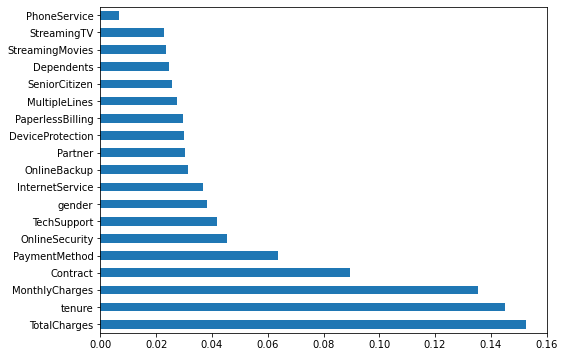

In [59]:
# plot graph of feature importances for better visualization 
plt.figure(figsize = (8,6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [60]:
# The dataset is unbalanced, by using the oversampling method SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE

In [61]:
# Create an instance of SMOTE
sm = SMOTE(random_state=42)
# Fit and apply SMOTE
X_resampled, y_resampled = sm.fit_resample(X, Y)

In [62]:
test.shape

(20, 19)

In [63]:
# Spliting the dataset into Training and testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=0)

In [64]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8278, 19)
(8278,)
(2070, 19)
(2070,)


## MODEL BULDING

**LOGISTIC REGRESSION**

In [65]:
lgr = LogisticRegression()
lgr.fit(X_train, Y_train)

LogisticRegression()

In [66]:
lgr_y_pred = lgr.predict(X_test)
lgr_y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [67]:
lgr_acc = accuracy_score(Y_test, lgr_y_pred)
lgr_acc

0.8033816425120773

In [68]:
# Model evaluation metrics
confusion_matrix(Y_test, lgr_y_pred)

array([[799, 234],
       [173, 864]], dtype=int64)

In [69]:
lgr_report = classification_report(Y_test, lgr_y_pred)
print(lgr_report)

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1033
           1       0.79      0.83      0.81      1037

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



**NAIVE BAYES**

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Create a Gaussian Naive Bayes model
naivey_model = GaussianNB()
naivey_model.fit(X_train, Y_train)

GaussianNB()

In [72]:
# Use the trained model to make predictions on the testing data
naivey_pred = naivey_model.predict(X_test)
naivey_pred

array([1, 1, 1, ..., 1, 0, 1])

In [73]:
# Calculate the accuracy score of the model
naivey_acc = accuracy_score(Y_test, naivey_pred)
naivey_acc

0.7782608695652173

In [74]:
# Model evaluation metrics
confusion_matrix(Y_test, naivey_pred)

array([[776, 257],
       [202, 835]], dtype=int64)

In [75]:
NB_report = classification_report(Y_test, naivey_pred)
print(NB_report)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1033
           1       0.76      0.81      0.78      1037

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, Y_train)

In [ ]:
# Use the trained model to make predictions on the testing data
svm_pred = svm_clf.predict(X_test)
svm_pred

In [65]:
# Calculate the accuracy score of the model
svm_acc = accuracy_score(Y_test, svm_pred)
svm_acc

0.7721788502484032

In [66]:
# Model evaluation metrics
confusion_matrix(Y_test, svm_pred)

array([[944,  97],
       [224, 144]], dtype=int64)

In [67]:
svm_report = classification_report(Y_test, svm_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1041
           1       0.60      0.39      0.47       368

    accuracy                           0.77      1409
   macro avg       0.70      0.65      0.66      1409
weighted avg       0.75      0.77      0.75      1409



**KNN CLASSIFICATION**

In [77]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, Y_train)

KNeighborsClassifier()

In [78]:
# Predict the labels for the test data
knn_y_pred = knn_clf.predict(X_test)
knn_y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [79]:
# Calculate the accuracy score of the model
knn_acc = accuracy_score(Y_test, knn_y_pred)
knn_acc

0.7768115942028986

In [80]:
# Model evaluation metrics
confusion_matrix(Y_test, knn_y_pred)

array([[739, 294],
       [168, 869]], dtype=int64)

In [81]:
knn_report = classification_report(Y_test, knn_y_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1033
           1       0.75      0.84      0.79      1037

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



**DECISSIONTREE CLASSIFIER**

In [83]:
# Train a decision tree classifier with max_depth=3
clf = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [84]:
# Predict the labels for the test data
dtc_y_pred = clf.predict(X_test)
dtc_y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [85]:
# Calculate the accuracy score of the model
dtc_acc = accuracy_score(Y_test, dtc_y_pred)
dtc_acc

0.8009661835748793

In [86]:
# Model evaluation metrics
confusion_matrix(Y_test, dtc_y_pred)

array([[788, 245],
       [167, 870]], dtype=int64)

In [87]:
dtc_report = classification_report(Y_test, dtc_y_pred)
print(dtc_report)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1033
           1       0.78      0.84      0.81      1037

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



**RANDOMFOREST CLASSIFIER**

In [101]:
# Train a Random Forest classifier with 100 trees
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [102]:
# Predict the labels for the test data
rfc_y_pred = rf_clf.predict(X_test)
rfc_y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [103]:
# Calculate the accuracy score of the model
rfc_acc = accuracy_score(Y_test, rfc_y_pred)
rfc_acc

0.8521739130434782

In [104]:
# Model evaluation metrics
confusion_matrix(Y_test, rfc_y_pred)

array([[871, 162],
       [144, 893]], dtype=int64)

In [105]:
rfc_report = classification_report(Y_test, rfc_y_pred)
print(rfc_report)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.85      0.86      0.85      1037

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



**HYPERPARAMETER TUNNING-RANDOMFOREST CLASSIFIER**

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [108]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [109]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [110]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid,scoring='accuracy',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1) 

In [111]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=390; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=390; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=390; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=390; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=390; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=463; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=463; total time=   4.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 136, 172, 209,
                                                         245, 281, 318, 354,
                                                         390, 427, 463, 500]},
                   random_state=42, scoring='accuracy', verbose=2)

In [112]:
# selecting the best parameters
rf_random.best_params_ 

{'n_estimators': 427,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [131]:
prediction = rf_random.predict(X_test)
prediction

array([1, 0, 1, ..., 1, 0, 1])

In [114]:
# Calculate the accuracy score of the model
rf_acc = accuracy_score(Y_test, prediction)
rf_acc

0.8502415458937198

In [115]:
rf_report = classification_report(Y_test, prediction)
print(rf_report)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.84      0.86      0.85      1037

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



**Prediction test dataset**

In [118]:
y_test_pred=rf_clf.predict(test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

**Creating a Submission file**

In [120]:
# submission file contains only one column that is Churn column which having the predicted column
submission_df = pd.DataFrame(y_test_pred, columns=['Churn'])

In [121]:
submission_df.shape

(20, 1)

In [122]:
# converting the submission_df dataframe into csv file format
submission_df.to_csv('DarshanHM_submission.csv', index=False)

**Comparing the performance of all models on the Telecom_churn data**

In [123]:
# Train and evaluate different models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
]

In [124]:
for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print(name, "accuracy:", accuracy)

Logistic Regression accuracy: 0.8033816425120773
Naive Bayes accuracy: 0.7782608695652173
KNN accuracy: 0.7768115942028986
Decision Tree accuracy: 0.7893719806763285
Random Forest accuracy: 0.851207729468599


In [125]:
# The Randomforest classifier model is selected for the pickling process that is for deployment 
# importing the pickle model
import pickle

pickle file will stores the all the information regarding the model in a serialized format and then load the pickle file and do the prediction

In [126]:
# converting to pickle file 
pickle.dump(rf_clf, open('rf_clf.pkl','wb'))
# rf_clf.pkl is file name which is created by open function and with write byte mode. 

In [127]:
# load the pickle file 
pickled_model=pickle.load(open('rf_clf.pkl','rb')) # rb = read byte mode

In [128]:
# prediction 
pickled_model.predict(test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])